In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
import os
  
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 수요를 충족한 자치구 모아두기
over = ['금천구', '서대문구', '마포구', '중구', '구로구', '송파구', '강남구', '광진구', '서초구', '양천구', '영등포구', '용산구', '은평구', '종로구']

## 비만율 비교

In [ ]:
# 비만율 데이터 가져온 후 다듬기
obesity = pd.read_excel('/content/drive/MyDrive/EDA/시·군·구별_비만율_자가보고__20220804005543.xlsx')
obesity = obesity.iloc[2:27,:].reset_index(drop = True)
obesity

,시군구별(1),시군구별(2),시군구별(3),2009,2009.1,2009.2,2009.3,2009.4,2010,2010.1,...,2018,2018.1,2018.2,2018.3,2018.4,2020,2020.1,2020.2,2020.3,2020.4
0,NaN,강남구,소계,916.0,19.6,1.4,20.5,1.3,914.0,16.3,...,906.0,23.8,1.3,24.1,1.3,909.0,24.8,1.4,26.3,1.3
1,NaN,강동구,소계,920.0,21.8,1.7,21.7,1.5,902.0,21.1,...,896.0,30.1,1.7,29.6,1.8,916.0,31.3,1.8,32.0,1.6
2,NaN,강북구,소계,919.0,23.4,1.4,23.1,1.6,889.0,22.1,...,838.0,28.5,1.9,29.3,1.7,904.0,30.3,1.7,31.2,2.0
3,NaN,강서구,소계,938.0,20.7,1.3,20.7,1.3,909.0,21.2,...,877.0,30.7,1.9,30.7,1.6,889.0,29.9,1.8,31.2,1.9
4,NaN,관악구,소계,900.0,22.2,1.7,22.4,1.4,928.0,20.5,...,906.0,26.2,1.4,26.1,1.7,917.0,26.6,1.6,25.5,1.5
5,NaN,광진구,소계,938.0,20.2,1.6,20.6,1.4,908.0,21.0,...,909.0,30.5,1.6,30.4,1.6,921.0,24.6,1.2,24.5,1.3
6,NaN,구로구,소계,896.0,25.4,1.6,24.7,1.5,895.0,21.3,...,897.0,31.3,1.7,30.3,1.6,907.0,29.0,1.5,28.7,1.7
7,NaN,금천구,소계,914.0,23.5,1.6,23.3,1.4,931.0,22.4,...,883.0,29.0,1.7,28.2,1.7,911.0,29.9,1.9,29.6,1.7
8,NaN,노원구,소계,922.0,20.1,1.4,19.9,1.4,906.0,25.1,...,901.0,30.2,1.4,30.4,1.6,903.0,30.9,1.6,31.7,1.7
9,NaN,도봉구,소계,920.0,21.5,1.5,21.7,1.5,903.0,26.6,...,892.0,27.9,1.6,27.5,1.6,904.0,33.5,2.0,36.0,1.8


In [ ]:
# 2020년 비만율 데이터만 뽑아내기
obesity_raw = pd.DataFrame()
obesity_raw['지역'] = obesity['시군구별(2)']
obesity_raw['2020'] = obesity['2020.1']

obesity_raw

,지역,2020
0,강남구,24.8
1,강동구,31.3
2,강북구,30.3
3,강서구,29.9
4,관악구,26.6
5,광진구,24.6
6,구로구,29.0
7,금천구,29.9
8,노원구,30.9
9,도봉구,33.5


In [ ]:
# 수요를 충족한 자치구와 그렇지 못한 자치구로 데이터프레임 나누기
obesity_over = []
obesity_less = []
obesity_raw['수요'] = obesity_raw['지역'].copy()

for i in range(len(obesity_raw)):
  if obesity_raw['지역'][i] in over:
    obesity_raw['수요'][i] = '충족'
    obesity_over.append(obesity_raw.iloc[i,:])
  else:
    obesity_raw['수요'][i] = '부족'
    obesity_less.append(obesity_raw.iloc[i,:])

obesity_over = pd.DataFrame(obesity_over).reset_index(drop = True)
obesity_less = pd.DataFrame(obesity_less).reset_index(drop = True)

분산 동일성 검정: p-value>0.1이므로 가설 채택

In [ ]:
levene = stats.levene(obesity_over['2020'], obesity_less['2020'])
print("Obesity LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

Obesity LeveneResult(statistic =   0, pvalue = 0.949)


평균 동일성 검정: p-value<0.05이므로 평균이 동일하다는 가설 기각

In [ ]:
obesity_ttest = stats.ttest_ind(obesity_over['2020'], obesity_less['2020'], equal_var = True)
print("Assuming equal variances(Obesity) : t-value = %.3f, p-value = %.3f)" % obesity_ttest)

Assuming equal variances(Obesity) : t-value = -4.194, p-value = 0.000)


#### box plot으로 시각화

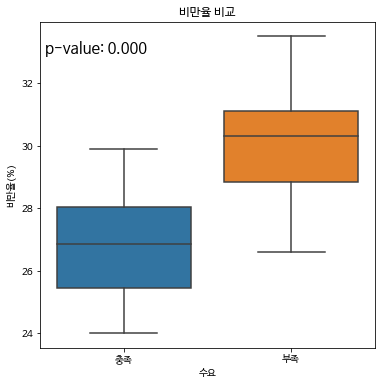

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '2020', data = obesity_raw)
plt.title('비만율 비교')
plt.text(-0.47, 33.0, 'p-value: %.3f'% obesity_ttest[1], fontsize = 15)
plt.ylabel('비만율(%)')
plt.show()

#### 다른 질병들에 대해서도 동일하게 진행

## 고혈압 비교

In [ ]:
blood = pd.read_excel('/content/drive/MyDrive/EDA/수요에 따른 동일성 검정/시·군·구별_고혈압_진단_경험률_30세_이상__20220818122116.xlsx')
blood = blood.iloc[2:27,:].reset_index(drop = True)
blood

,시군구별(1),시군구별(2),시군구별(3),2020,2020.1,2020.2,2020.3,2020.4
0,NaN,강남구,소계,749.0,19.9,1.5,17.3,1.2
1,NaN,강동구,소계,781.0,25.0,1.6,19.5,1.2
2,NaN,강북구,소계,791.0,30.5,1.8,22.6,1.4
3,NaN,강서구,소계,781.0,22.2,1.8,18.0,1.2
4,NaN,관악구,소계,699.0,24.7,1.7,18.8,1.2
5,NaN,광진구,소계,740.0,23.2,1.6,18.7,1.3
6,NaN,구로구,소계,777.0,23.9,1.7,18.8,1.2
7,NaN,금천구,소계,769.0,28.1,1.6,21.2,1.3
8,NaN,노원구,소계,790.0,27.9,2.0,20.8,1.2
9,NaN,도봉구,소계,760.0,26.5,1.6,20.5,1.4


In [ ]:
blood_raw = pd.DataFrame()
blood_raw['지역'] = blood['시군구별(2)']
blood_raw['2020'] = blood['2020.1']

blood_raw

,지역,2020
0,강남구,19.9
1,강동구,25.0
2,강북구,30.5
3,강서구,22.2
4,관악구,24.7
5,광진구,23.2
6,구로구,23.9
7,금천구,28.1
8,노원구,27.9
9,도봉구,26.5


In [ ]:
blood_over = []
blood_less = []
blood_raw['수요'] = blood_raw['지역'].copy()

for i in range(len(blood_raw)):
  if blood_raw['지역'][i] in over:
    blood_raw['수요'][i] = '충족'
    blood_over.append(blood_raw.iloc[i,:])
  else:
    blood_raw['수요'][i] = '부족'
    blood_less.append(blood_raw.iloc[i,:])

blood_over = pd.DataFrame(blood_over).reset_index(drop = True)
blood_less = pd.DataFrame(blood_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(blood_over['2020'], blood_less['2020'])
print("Blood LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

Blood LeveneResult(statistic =   0, pvalue = 0.497)


분산 동일하다

In [ ]:
blood_ttest = stats.ttest_ind(blood_over['2020'], blood_less['2020'], equal_var = True)
print("Assuming equal variances(Blood) : t-value = %.3f, p-value = %.3f)" % blood_ttest)

Assuming equal variances(Blood) : t-value = -1.463, p-value = 0.157)


평균도 동일하다

#### 시각화

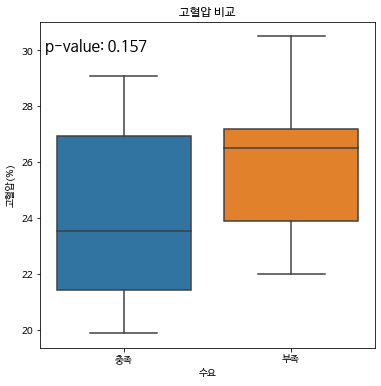

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '2020', data = blood_raw)
plt.text(-0.47, 30.0, 'p-value: %.3f'%blood_ttest[1], fontsize = 15)
plt.title('고혈압 비교')
plt.ylabel('고혈압(%)')
plt.show()

## 당뇨병 비교

In [ ]:
sugar = pd.read_excel('/content/drive/MyDrive/EDA/수요에 따른 동일성 검정/시·군·구별_당뇨병_진단_경험률_30세_이상__20220818122910.xlsx')
sugar = sugar.iloc[2:27,:].reset_index(drop = True)
sugar

,시군구별(1),시군구별(2),시군구별(3),2020,2020.1,2020.2,2020.3,2020.4
0,NaN,강남구,소계,749.0,7.5,1.0,6.3,0.8
1,NaN,강동구,소계,781.0,11.0,1.2,8.5,0.9
2,NaN,강북구,소계,792.0,14.0,1.2,10.2,0.9
3,NaN,강서구,소계,781.0,9.2,1.0,7.2,0.7
4,NaN,관악구,소계,699.0,9.0,0.9,7.2,0.8
5,NaN,광진구,소계,740.0,10.6,1.1,8.4,0.9
6,NaN,구로구,소계,777.0,10.6,1.1,8.3,0.9
7,NaN,금천구,소계,769.0,12.2,1.4,9.0,1.0
8,NaN,노원구,소계,790.0,11.7,1.4,8.5,0.9
9,NaN,도봉구,소계,760.0,13.0,1.3,9.7,1.0


In [ ]:
sugar_raw = pd.DataFrame()
sugar_raw['지역'] = sugar['시군구별(2)']
sugar_raw['2020'] = sugar['2020.1']
sugar_raw

,지역,2020
0,강남구,7.5
1,강동구,11.0
2,강북구,14.0
3,강서구,9.2
4,관악구,9.0
5,광진구,10.6
6,구로구,10.6
7,금천구,12.2
8,노원구,11.7
9,도봉구,13.0


In [ ]:
sugar_over = []
sugar_less = []
sugar_raw['수요'] = sugar_raw['지역'].copy()

for i in range(len(sugar_raw)):
  if sugar_raw['지역'][i] in over:
    sugar_raw['수요'][i] = '충족'
    sugar_over.append(sugar_raw.iloc[i,:])
  else:
    sugar_raw['수요'][i] = '부족'
    sugar_less.append(sugar_raw.iloc[i,:])

sugar_over = pd.DataFrame(sugar_over).reset_index(drop = True)
sugar_less = pd.DataFrame(sugar_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(sugar_over['2020'], sugar_less['2020'])
print("Sugar LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

Sugar LeveneResult(statistic =   1, pvalue = 0.453)


분산 동일하다

In [ ]:
sugar_ttest = stats.ttest_ind(sugar_over['2020'], sugar_less['2020'], equal_var = True)
print("Assuming equal variances(Sugar) : (t-value = %.3f, p-value = %.3f)" % sugar_ttest)

Assuming equal variances(Sugar) : (t-value = -1.998, p-value = 0.058)


평균은 동일하다..? 살짝 애매

#### 시각화

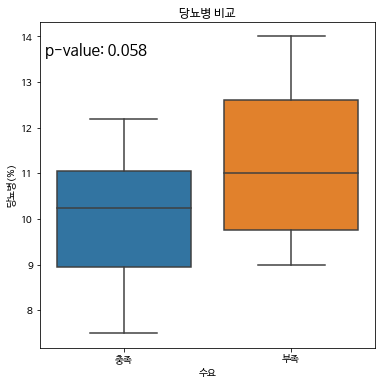

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '2020', data = sugar_raw)
plt.text(-0.47, 13.6, 'p-value: %.3f'%sugar_ttest[1], fontsize = 15)
plt.title('당뇨병 비교')
plt.ylabel('당뇨병(%)')
plt.show()

# 대사 위험군 보유현황

In [ ]:
danger = pd.read_excel('/content/drive/MyDrive/EDA/수요에 따른 동일성 검정/시군구별_성별_대사증후군_위험요인별_현황_20220818125532.xlsx')
danger = danger.iloc[5:83,:].dropna(subset = ['시군구별(2)']).drop(['시군구별(1)', '성별(1)'], axis = 1).reset_index(drop = True)
danger

,시군구별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10
0,소계,2507172.0,634997.0,25.3,1084873.0,43.3,992080.0,39.6,433316.0,17.3,157172.0,6.3
1,종로구,36223.0,9347.0,25.8,15171.0,41.9,14726.0,40.7,6014.0,16.6,2332.0,6.4
2,중구,32363.0,7731.0,23.9,13869.0,42.9,12929.0,39.9,5671.0,17.5,2135.0,6.6
3,용산구,51931.0,12661.0,24.4,21056.0,40.5,20895.0,40.2,8306.0,16.0,2525.0,4.9
4,성동구,76186.0,18913.0,24.8,31793.0,41.7,28584.0,37.5,12842.0,16.9,4640.0,6.1
5,광진구,92372.0,22995.0,24.9,38590.0,41.8,33974.0,36.8,14886.0,16.1,5334.0,5.8
6,동대문구,87695.0,25463.0,29.0,40644.0,46.3,34685.0,39.6,15222.0,17.4,6045.0,6.9
7,중랑구,102587.0,28683.0,28.0,50061.0,48.8,45312.0,44.2,18783.0,18.3,6562.0,6.4
8,성북구,111445.0,30244.0,27.1,51030.0,45.8,45530.0,40.9,20006.0,18.0,7507.0,6.7
9,강북구,78423.0,21999.0,28.1,40355.0,51.5,34514.0,44.0,15666.0,20.0,6000.0,7.7


### 복부비만

In [ ]:
danger_1 = pd.DataFrame(columns = ['지역', '복부비만'])
danger_1['지역'] = danger['시군구별(2)']
danger_1['복부비만'] = danger['2020.2']
danger_1 = danger_1.drop(0, axis = 0).reset_index(drop = True)
danger_1

,지역,복부비만
0,종로구,25.8
1,중구,23.9
2,용산구,24.4
3,성동구,24.8
4,광진구,24.9
5,동대문구,29.0
6,중랑구,28.0
7,성북구,27.1
8,강북구,28.1
9,도봉구,27.7


In [ ]:
danger_1_over = []
danger_1_less = []
danger_1['수요'] = danger_1['지역'].copy()

for i in range(len(danger_1)):
  if danger_1['지역'][i] in over:
    danger_1['수요'][i] = '충족'
    danger_1_over.append(danger_1.iloc[i,:])
  else:
    danger_1['수요'][i] = '부족'
    danger_1_less.append(danger_1.iloc[i,:])

danger_1_over = pd.DataFrame(danger_1_over).reset_index(drop = True)
danger_1_less = pd.DataFrame(danger_1_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(danger_1_over['복부비만'], danger_1_less['복부비만'])
print("LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

LeveneResult(statistic =   0, pvalue = 0.817)


분산 동일하다

In [ ]:
danger_1_ttest = stats.ttest_ind(danger_1_over['복부비만'], danger_1_less['복부비만'], equal_var = True)
print("Assuming equal variances(복부비만) : (t-value = %.3f, p-value = %.3f)" % danger_1_ttest)

Assuming equal variances(복부비만) : (t-value = -2.322, p-value = 0.029)


평균 유의하게 다르다

#### 시각화

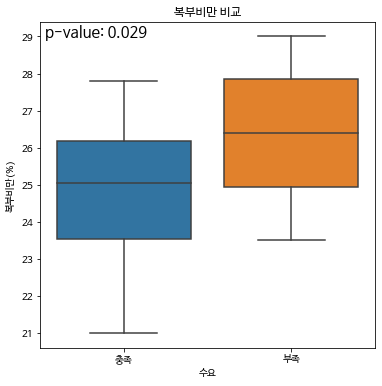

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '복부비만', data = danger_1)
plt.text(-0.47, 29.0, 'p-value: %.3f'% danger_1_ttest[1], fontsize = 15)
plt.title('복부비만 비교')
plt.ylabel('복부비만(%)')
plt.show()

### 높은 혈압

In [ ]:
danger_2 = pd.DataFrame(columns = ['지역', '높은혈압'])
danger_2['지역'] = danger['시군구별(2)']
danger_2['높은혈압'] = danger['2020.4']
danger_2 = danger_2.drop(0, axis = 0).reset_index(drop = True)
danger_2

,지역,높은혈압
0,종로구,41.9
1,중구,42.9
2,용산구,40.5
3,성동구,41.7
4,광진구,41.8
5,동대문구,46.3
6,중랑구,48.8
7,성북구,45.8
8,강북구,51.5
9,도봉구,49.3


In [ ]:
danger_2_over = []
danger_2_less = []
danger_2['수요'] = danger_2['지역'].copy()

for i in range(len(danger_2)):
  if danger_2['지역'][i] in over:
    danger_2['수요'][i] = '충족'
    danger_2_over.append(danger_2.iloc[i,:])
  else:
    danger_2['수요'][i] = '부족'
    danger_2_less.append(danger_2.iloc[i,:])

danger_2_over = pd.DataFrame(danger_2_over).reset_index(drop = True)
danger_2_less = pd.DataFrame(danger_2_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(danger_2_over['높은혈압'], danger_2_less['높은혈압'])
print("LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

LeveneResult(statistic =   0, pvalue = 0.852)


분산 동일하다

In [ ]:
danger_2_ttest = stats.ttest_ind(danger_2_over['높은혈압'], danger_2_less['높은혈압'], equal_var = True)
print("Assuming equal variances(높은혈압) : (t-value = %.3f, p-value = %.3f)" % danger_2_ttest)

Assuming equal variances(높은혈압) : (t-value = -2.743, p-value = 0.012)


평균 유의하게 차이 있다

#### 시각화


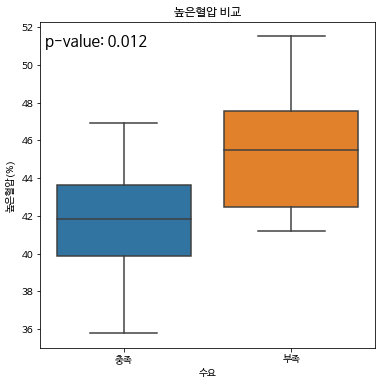

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '높은혈압', data = danger_2)
plt.text(-0.47, 51.0, 'p-value: %.3f'% danger_2_ttest[1], fontsize = 15)
plt.title('높은혈압 비교')
plt.ylabel('높은혈압(%)')
plt.show()

### 높은 혈당

In [ ]:
danger_3 = pd.DataFrame(columns = ['지역', '높은혈당'])
danger_3['지역'] = danger['시군구별(2)']
danger_3['높은혈당'] = danger['2020.6']
danger_3 = danger_3.drop(0, axis = 0).reset_index(drop = True)
danger_3

,지역,높은혈당
0,종로구,40.7
1,중구,39.9
2,용산구,40.2
3,성동구,37.5
4,광진구,36.8
5,동대문구,39.6
6,중랑구,44.2
7,성북구,40.9
8,강북구,44.0
9,도봉구,44.2


In [ ]:
danger_3_over = []
danger_3_less = []
danger_3['수요'] = danger_3['지역'].copy()

for i in range(len(danger_3)):
  if danger_3['지역'][i] in over:
    danger_3['수요'][i] = '충족'
    danger_3_over.append(danger_3.iloc[i,:])
  else:
    danger_3['수요'][i] = '부족'
    danger_3_less.append(danger_3.iloc[i,:])

danger_3_over = pd.DataFrame(danger_3_over).reset_index(drop = True)
danger_3_less = pd.DataFrame(danger_3_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(danger_3_over['높은혈당'], danger_3_less['높은혈당'])
print("LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

LeveneResult(statistic =   0, pvalue = 0.937)


분산 동일하다

In [ ]:
danger_3_ttest = stats.ttest_ind(danger_3_over['높은혈당'], danger_3_less['높은혈당'], equal_var = True)
print("Assuming equal variances(높은혈당) : (t-value = %.3f, p-value = %.3f)" % danger_3_ttest)

Assuming equal variances(높은혈당) : (t-value = -0.780, p-value = 0.443)


유의한 차이가 없다

#### 시각화

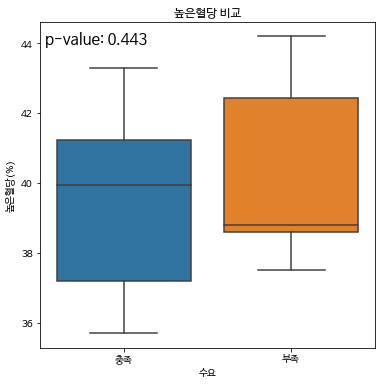

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '높은혈당', data = danger_3)
plt.text(-0.47, 44.0, 'p-value: %.3f'% danger_3_ttest[1], fontsize = 15)
plt.title('높은혈당 비교')
plt.ylabel('높은혈당(%)')
plt.show()

### 고중성지방혈증

In [ ]:
danger_4 = pd.DataFrame(columns = ['지역', '고중성지방혈증'])
danger_4['지역'] = danger['시군구별(2)']
danger_4['고중성지방혈증'] = danger['2020.8']
danger_4 = danger_4.drop(0, axis = 0).reset_index(drop = True)
danger_4

,지역,고중성지방혈증
0,종로구,16.6
1,중구,17.5
2,용산구,16.0
3,성동구,16.9
4,광진구,16.1
5,동대문구,17.4
6,중랑구,18.3
7,성북구,18.0
8,강북구,20.0
9,도봉구,20.3


In [ ]:
danger_4_over = []
danger_4_less = []
danger_4['수요'] = danger_4['지역'].copy()

for i in range(len(danger_4)):
  if danger_4['지역'][i] in over:
    danger_4['수요'][i] = '충족'
    danger_4_over.append(danger_4.iloc[i,:])
  else:
    danger_4['수요'][i] = '부족'
    danger_4_less.append(danger_4.iloc[i,:])

danger_4_over = pd.DataFrame(danger_4_over).reset_index(drop = True)
danger_4_less = pd.DataFrame(danger_4_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(danger_4_over['고중성지방혈증'], danger_4_less['고중성지방혈증'])
print("LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

LeveneResult(statistic =   0, pvalue = 0.722)


분산 동일하다

In [ ]:
danger_4_ttest = stats.ttest_ind(danger_4_over['고중성지방혈증'], danger_4_less['고중성지방혈증'], equal_var = True)
print("Assuming equal variances(고중성지방혈증) : (t-value = %.4f, p-value = %.4f)" % danger_4_ttest)

Assuming equal variances(고중성지방혈증) : (t-value = -1.8832, p-value = 0.0724)


큰 차이를 보이지 않는다

#### 시각화

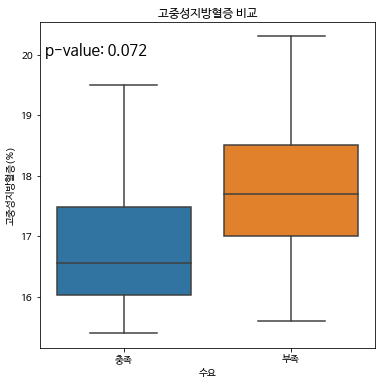

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '고중성지방혈증', data = danger_4)
plt.text(-0.47, 20.0, 'p-value: %.3f'% danger_4_ttest[1], fontsize = 15)
plt.title('고중성지방혈증 비교')
plt.ylabel('고중성지방혈증(%)')
plt.show()

### 낮은 HDL 콜레스테롤 혈증

In [ ]:
danger_5 = pd.DataFrame(columns = ['지역', '낮은 HDL 콜레스테롤 혈증'])
danger_5['지역'] = danger['시군구별(2)']
danger_5['낮은 HDL 콜레스테롤 혈증'] = danger['2020.10']
danger_5 = danger_5.drop(0, axis = 0).reset_index(drop = True)
danger_5

,지역,낮은 HDL 콜레스테롤 혈증
0,종로구,6.4
1,중구,6.6
2,용산구,4.9
3,성동구,6.1
4,광진구,5.8
5,동대문구,6.9
6,중랑구,6.4
7,성북구,6.7
8,강북구,7.7
9,도봉구,7.2


In [ ]:
danger_5_over = []
danger_5_less = []
danger_5['수요'] = danger_5['지역'].copy()

for i in range(len(danger_5)):
  if danger_5['지역'][i] in over:
    danger_5['수요'][i] = '충족'
    danger_5_over.append(danger_5.iloc[i,:])
  else:
    danger_5['수요'][i] = '부족'
    danger_5_less.append(danger_5.iloc[i,:])

danger_5_over = pd.DataFrame(danger_5_over).reset_index(drop = True)
danger_5_less = pd.DataFrame(danger_5_less).reset_index(drop = True)

In [ ]:
levene = stats.levene(danger_5_over['낮은 HDL 콜레스테롤 혈증'], danger_5_less['낮은 HDL 콜레스테롤 혈증'])
print("LeveneResult(statistic = %3.f, pvalue = %.3f)" % levene)

LeveneResult(statistic =   0, pvalue = 0.706)


분산 동일하다

In [ ]:
danger_5_ttest = stats.ttest_ind(danger_5_over['낮은 HDL 콜레스테롤 혈증'], danger_5_less['낮은 HDL 콜레스테롤 혈증'], equal_var = True)
print("Assuming equal variances(낮은 HDL 콜레스테롤 혈증) : (t-value = %.4f, p-value = %.4f)" % danger_5_ttest)

Assuming equal variances(낮은 HDL 콜레스테롤 혈증) : (t-value = -1.4268, p-value = 0.1671)


평균은 큰 차이를 보이지 않는다

#### 시각화

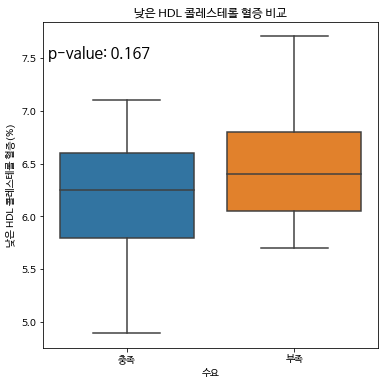

In [ ]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = '수요', y = '낮은 HDL 콜레스테롤 혈증', data = danger_5)
plt.text(-0.47, 7.5, 'p-value: %.3f'% danger_5_ttest[1], fontsize = 15)
plt.title('낮은 HDL 콜레스테롤 혈증 비교')
plt.ylabel('낮은 HDL 콜레스테롤 혈증(%)')
plt.show()